## 기본 셋팅

In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from sklearn.preprocessing import StandardScaler


pd.options.display.float_format = '{:.2f}'.format

In [ ]:
df = pd.read_csv('/content/drive/Shareddrives/다빈치/SBK/Target.csv')
cust_df = df.copy()
cust_df

,Unnamed: 0,cust,monetary,recency,frequency
0,0,M000034966,654120.00,9.00,12.00
1,1,M000059535,0.00,366.00,0.00
2,2,M000136117,27373630.00,2.00,70.00
3,3,M000201112,53120.00,34.00,5.00
4,4,M000225114,1937700.00,1.00,78.00
...,...,...,...,...,...
29908,29908,M999708287,0.00,366.00,0.00
29909,29909,M999770689,1187140.00,1.00,122.00
29910,29910,M999849895,1103792.00,31.00,34.00
29911,29911,M999926092,0.00,366.00,0.00


## 전체 데이터

In [ ]:
sample_df = cust_df.drop(['Unnamed: 0',	'cust'], axis = 1)
sample_df.head()

,monetary,recency,frequency
0,654120.00,9.00,12.00
1,0.00,366.00,0.00
2,27373630.00,2.00,70.00
3,53120.00,34.00,5.00
4,1937700.00,1.00,78.00


In [ ]:
condition = sample_df[sample_df[['monetary', 'frequency']].sum(axis = 1) == 0].index
sample_df = sample_df.drop(condition)
sample_df 

,monetary,recency,frequency
0,654120.00,9.00,12.00
2,27373630.00,2.00,70.00
3,53120.00,34.00,5.00
4,1937700.00,1.00,78.00
5,6052700.00,28.00,48.00
...,...,...,...
29906,1484022.00,48.00,8.00
29907,2851370.00,14.00,17.00
29909,1187140.00,1.00,122.00
29910,1103792.00,31.00,34.00


In [ ]:
# scaler = StandardScaler()
# sample_df = scaler.fit_transform(sample_df)
# sample_df = pd.DataFrame(sample_df)
# sample_df

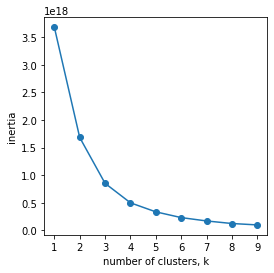

In [ ]:
ks = range(1,10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(sample_df)
    inertias.append(model.inertia_)

# Plot ks vs inertias
plt.figure(figsize=(4, 4))

plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [ ]:
clust_model = KMeans(n_clusters = 4 # 클러스터 갯수
                     , n_init=10 # initial centroid를 몇번 샘플링한건지, 데이터가 많으면 많이 돌릴수록안정화된 결과가 나옴
                     , max_iter=500 # KMeans를 몇번 반복 수행할건지, K가 큰 경우 1000정도로 높여준다
                     , random_state = 42
                     , algorithm='auto'
                    )

# 생성한 모델로 데이터를 학습시킴
clust_model.fit(sample_df) # unsupervised learning 

# 결과 값을 변수에 저장
centers = clust_model.cluster_centers_ # 각 군집의 중심점
pred = clust_model.predict(sample_df) # 각 예측군집

pd.DataFrame(centers)

,0,1,2
0,2214971.45,50.20,43.22
1,95334059.98,8.87,158.08
2,26628813.29,14.64,128.33
3,290554733.78,5.44,170.67


In [ ]:
clust_df = sample_df.copy()
clust_df['clust'] = pred
clust_df.head()

,monetary,recency,frequency,clust
0,654120.00,9.00,12.00,0
2,27373630.00,2.00,70.00,2
3,53120.00,34.00,5.00,0
4,1937700.00,1.00,78.00,0
5,6052700.00,28.00,48.00,0


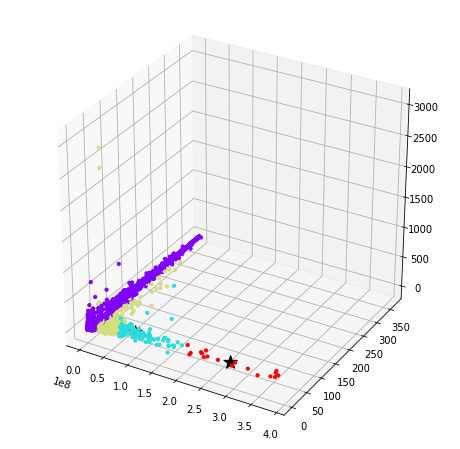

In [ ]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

X = clust_df

# 데이터 scatterplot
ax.scatter(  X.iloc[:,0]
           , X.iloc[:,1]
           , X.iloc[:,2]
           , c = X.clust
           , s = 10
           , cmap = "rainbow"
           , alpha = 1
          )

# centroid scatterplot
ax.scatter(centers[:,0],centers[:,1],centers[:,2] ,c='black', s=200, marker='*')


plt.show()


In [ ]:
cluster_mean= clust_df.groupby('clust').mean()
cluster_mean

,monetary,recency,frequency
clust,,,
0,2212122.91,50.21,43.21
1,95334059.98,8.87,158.08
2,26556698.15,14.64,128.18
3,290554733.78,5.44,170.67


In [ ]:
cluster_min = clust_df.groupby('clust').min()
cluster_min

,monetary,recency,frequency
clust,,,
0,10.00,1.00,1.00
1,61290790.00,1.00,15.00
2,14423191.00,1.00,2.00
3,205294750.00,1.00,66.00


## monetary

In [ ]:
monetary_df = sample_df[['monetary']]
monetary_df

,monetary
0,654120.00
2,27373630.00
3,53120.00
4,1937700.00
5,6052700.00
...,...
29906,1484022.00
29907,2851370.00
29909,1187140.00
29910,1103792.00


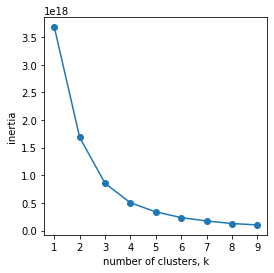

In [ ]:
ks = range(1,10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(monetary_df)
    inertias.append(model.inertia_)

# Plot ks vs inertias
plt.figure(figsize=(4, 4))

plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [ ]:
clust_model = KMeans(n_clusters = 4 # 클러스터 갯수
                     , n_init=10 # initial centroid를 몇번 샘플링한건지, 데이터가 많으면 많이 돌릴수록안정화된 결과가 나옴
                     , max_iter=500 # KMeans를 몇번 반복 수행할건지, K가 큰 경우 1000정도로 높여준다
                     , random_state = 42
                     , algorithm='auto'
                    )

# 생성한 모델로 데이터를 학습시킴
clust_model.fit(monetary_df) # unsupervised learning 

# 결과 값을 변수에 저장
centers = clust_model.cluster_centers_ # 각 군집의 중심점
pred = clust_model.predict(monetary_df) # 각 예측군집

pd.DataFrame(centers)

,0
0,2214971.45
1,95334059.98
2,26628813.29
3,290554733.78


In [ ]:
clust_df = monetary_df.copy()
clust_df['clust'] = pred
clust_df.head()

,monetary,clust
0,654120.00,0
2,27373630.00,2
3,53120.00,0
4,1937700.00,0
5,6052700.00,0


In [ ]:
cluster_min= clust_df.groupby('clust').min()
cluster_min

,monetary
clust,
0,10.00
1,61290790.00
2,14423191.00
3,205294750.00


## recency

In [ ]:
recency_df = sample_df[['recency']]
recency_df

,recency
0,9.00
2,2.00
3,34.00
4,1.00
5,28.00
...,...
29906,48.00
29907,14.00
29909,1.00
29910,31.00


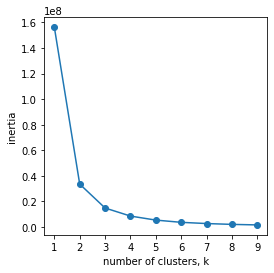

In [ ]:
ks = range(1,10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(recency_df)
    inertias.append(model.inertia_)

# Plot ks vs inertias
plt.figure(figsize=(4, 4))

plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [ ]:
clust_model = KMeans(n_clusters = 4 # 클러스터 갯수
                     , n_init=10 # initial centroid를 몇번 샘플링한건지, 데이터가 많으면 많이 돌릴수록안정화된 결과가 나옴
                     , max_iter=500 # KMeans를 몇번 반복 수행할건지, K가 큰 경우 1000정도로 높여준다
                     , random_state = 42
                     , algorithm='auto'
                    )

# 생성한 모델로 데이터를 학습시킴
clust_model.fit(recency_df) # unsupervised learning 

# 결과 값을 변수에 저장
centers = clust_model.cluster_centers_ # 각 군집의 중심점
pred = clust_model.predict(recency_df) # 각 예측군집

pd.DataFrame(centers)

,0
0,10.62
1,170.07
2,286.39
3,70.71


In [ ]:
clust_df = recency_df.copy()
clust_df['clust'] = pred
clust_df.head()

,recency,clust
0,9.00,0
2,2.00,0
3,34.00,0
4,1.00,0
5,28.00,0


In [ ]:
cluster_max= clust_df.groupby('clust').max()
cluster_max

,recency
clust,
0,40.00
1,228.00
2,365.00
3,120.00


## frequency

In [ ]:
frequency_df = sample_df[['frequency']]
frequency_df

,frequency
0,12.00
2,70.00
3,5.00
4,78.00
5,48.00
...,...
29906,8.00
29907,17.00
29909,122.00
29910,34.00


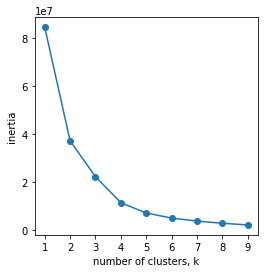

In [ ]:
ks = range(1,10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(frequency_df)
    inertias.append(model.inertia_)

# Plot ks vs inertias
plt.figure(figsize=(4, 4))

plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [ ]:
clust_model = KMeans(n_clusters = 4 # 클러스터 갯수
                     , n_init=10 # initial centroid를 몇번 샘플링한건지, 데이터가 많으면 많이 돌릴수록안정화된 결과가 나옴
                     , max_iter=500 # KMeans를 몇번 반복 수행할건지, K가 큰 경우 1000정도로 높여준다
                     , random_state = 42
                     , algorithm='auto'
                    )

# 생성한 모델로 데이터를 학습시킴
clust_model.fit(frequency_df) # unsupervised learning 

# 결과 값을 변수에 저장
centers = clust_model.cluster_centers_ # 각 군집의 중심점
pred = clust_model.predict(frequency_df) # 각 예측군집

pd.DataFrame(centers)

,0
0,20.53
1,80.04
2,2869.50
3,182.90


In [ ]:
clust_df = frequency_df.copy()
clust_df['clust'] = pred
clust_df.head()

,frequency,clust
0,12.00,0
2,70.00,1
3,5.00,0
4,78.00,1
5,48.00,0


In [ ]:
cluster_min= clust_df.groupby('clust').min()
cluster_min

,frequency
clust,
0,1.00
1,51.00
2,2712.00
3,132.00
